# Random Forest Regression

**House Tax Prediction**

In this project, we will be performing House Tax Prediction using the Random Forest algorithm.

([source link](https://machinelearningprojects.net/house-tax-prediction/))

## Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the dataset

In [5]:
data = pd.read_csv("data/HousingData.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Filling null values with mean

In [9]:
columns_with_null = ["CRIM", "ZN", "INDUS", "CHAS", "AGE", "LSTAT"]
for column in columns_with_null:
    data[column].fillna(data[column].mean(), inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Checking the correlation
Check the correlation of our target field `TAX` with other features.

In [12]:
data.corr()["TAX"].sort_values(ascending=False)

TAX        1.000000
RAD        0.910228
INDUS      0.716062
NOX        0.668023
CRIM       0.566528
LSTAT      0.524545
AGE        0.500589
PTRATIO    0.460853
CHAS      -0.031483
RM        -0.292048
ZN        -0.308334
B         -0.441808
MEDV      -0.468536
DIS       -0.534432
Name: TAX, dtype: float64

It means that our data is depending most on the `RAD` parameter followed by others

In [6]:
# removing outliers
# data = data[data['TAX']<500]
# data

## Matrix of features and labels

In [35]:
X = data.drop("TAX", axis=1).values
y = data["TAX"].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (506, 13)
y (506,)


## Splitting the dataset into the training set and test set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(f"X_train {X_train.shape}")
print(f"X_test  {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test  {y_test.shape}")

X_train (379, 13)
X_test  (127, 13)
y_train (379,)
y_test  (127,)


## Scaling the dataset

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\nFirst five rows of scaled X_train:\n{X_train[:5, :]}")
print(f"\nFirst five rows of scaled X_test:\n{X_test[:5, :]}")


First five rows of scaled X_train:
[[-0.39415317  0.4471399   0.01376167  0.01589379 -1.07873298 -1.02196078
   0.04929459  1.99457086 -0.27832777  0.27878885  0.34049624  0.82270492
  -0.44484602]
 [-0.40487206  0.57576579 -0.8588128  -0.27175702 -0.88911932 -0.55696276
  -0.79321963  1.50565148 -0.16291614  0.55287698  0.42774893 -0.48778088
  -0.32575001]
 [-0.40470042  1.21889524 -0.67122515  3.83995753 -0.94083214  1.37812218
  -0.72728374  0.4804933  -0.62456264 -0.40643148  0.34184377 -0.93737395
   1.14670973]
 [ 0.64370097 -0.49611663  1.04197767 -0.27175702  1.17939332  0.22862396
   1.09694272 -0.98282345  1.68366984  0.78128376  0.37250012  0.63265612
  -1.02949915]
 [ 0.90147176 -0.49611663  1.04197767 -0.27175702  1.05873008  0.67773696
   0.80389429 -0.9379895   1.68366984  0.78128376 -3.78699393  1.86230026
  -1.6358061 ]]

First five rows of scaled X_test:
[[-4.09259444e-01 -4.96116630e-01 -1.13579769e+00 -2.71757022e-01
  -8.28787704e-01  2.93390975e-02 -1.89215123e+

## Training the Random Forest Regression model with grid search

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfc = RandomForestRegressor()
params = {"n_estimators": [500, 600, 700, 700, 800, 900, 1000]}

grid_model = GridSearchCV(rfc, params, verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ...................................n_estimators=500; total time=   1.5s
[CV] END ...................................n_estimators=500; total time=   1.3s
[CV] END ...................................n_estimators=500; total time=   1.3s
[CV] END ...................................n_estimators=500; total time=   1.3s
[CV] END ...................................n_estimators=500; total time=   1.2s
[CV] END ...................................n_estimators=600; total time=   1.5s
[CV] END ...................................n_estimators=600; total time=   1.5s
[CV] END ...................................n_estimators=600; total time=   1.6s
[CV] END ...................................n_estimators=600; total time=   1.6s
[CV] END ...................................n_estimators=600; total time=   1.6s
[CV] END ...................................n_estimators=700; total time=   1.7s
[CV] END ...................................n_est

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [500, 600, 700, 700, 800, 900, 1000]},
             verbose=2)

Best parameters

In [39]:
grid_model.best_params_

{'n_estimators': 1000}

## Predicting the test set

In [40]:
y_pred = grid_model.predict(X_test)
pd.options.display.precision = 2
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,430,346.58
1,666,666.00
2,276,297.15
3,666,666.00
4,398,300.32
5,307,306.58
6,666,666.00
7,224,248.24
8,304,367.11
9,384,378.24


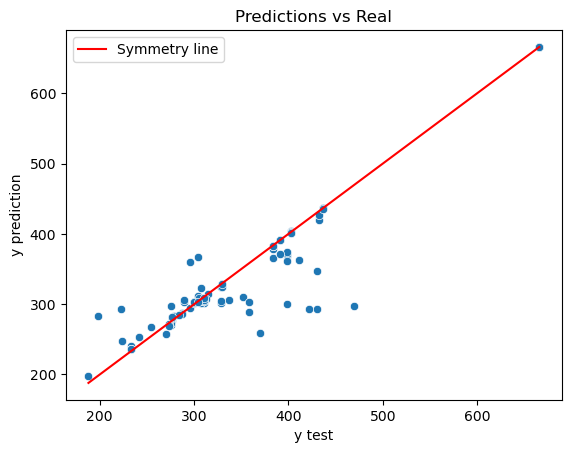

In [41]:
symmetry_line = [y_test.min(), y_test.max()]

sns.scatterplot(x=y_test, y=y_pred)
plt.plot(symmetry_line, symmetry_line, color="red", label="Symmetry line")
plt.xlabel("y test")
plt.ylabel("y prediction")
plt.title("Predictions vs Real")
plt.legend()
plt.plot();

## Plotting the residuals

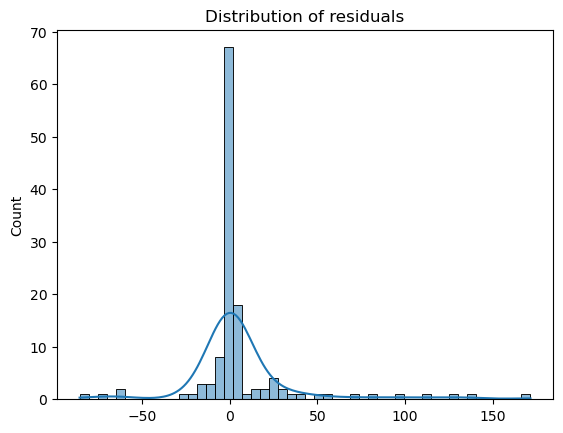

In [42]:
sns.histplot((y_test-y_pred), bins=50, kde=True)
plt.title("Distribution of residuals");

## Evaluating the model

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"The R2 score of the model: {r2:.3f}")
print(f"The mse of the model: {mse:.3f}")

The R2 score of the model: 0.958
The mse of the model: 1063.863
